<a href="https://colab.research.google.com/github/nicsim22/DS110-Content/blob/main/Lecture15Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas II

*Cynthia shut her laptop in frustration.  Even filtering by distance to her current location and a few other criteria, there were too many cafes to consider trying all of them.  She headed for the closest one, just to actually get some coffee.*

What am I doing here, anyway?

*Along the way, a Times Square style marquee scrolled headlines in French.  She spoke enough to understand the gist:  The deadly Bleeding Nail Disease, or BND, was on the rise in several countries, including Morocco, Egypt, Kenya, and the Democratic Republic of Congo itself.  Scientists were inviting the general public to inspect their data and join the search for an explanation of the disease.*

Wasn't that the same disease the man on the street offered me a flier about?

*When Cynthia arrived at the cafe, she connected to the wireless and downloaded the public BND dataset.  Maybe working on this mystery would help her solve her other mystery.  At least she was in a cafe - it seemed like a start.*

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving starbucks_drinkMenu_expanded.csv to starbucks_drinkMenu_expanded.csv


In [ ]:
import pandas as pd
df = pd.read_csv('starbucks_drinkMenu_expanded.csv', index_col = 'Beverage')
df.head()

,Beverage_category,Beverage_prep,Calories,Total_Fat_g,Trans_Fat_g,Saturated_Fat_g,Sodium_mg,Total_Carbohydrates_g,Cholesterol_mg,Dietary Fibre_g,Sugars_g,Protein_g,Vitamin_A,Vitamin_C,Calcium,Iron,Caffeine_mg
Beverage,,,,,,,,,,,,,,,,,
Brewed Coffee,Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
Brewed Coffee,Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
Brewed Coffee,Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
Brewed Coffee,Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
Caffè Latte,Classic Espresso Drinks,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


## Convenient mathematical functions

The Series objects that make up the columns of a DataFrame have a variety of convenient functions.

For example, there's an existing implementation of max() that would have made our previous efforts more concise.  And while max() finds the maximum value, idxmax() finds the index of that value - the name of the item instead of the value.

//data science part of analysis//

In [ ]:
print(df.loc[:, "Protein_g"].mean())
print(df.loc[:, "Protein_g"].max())
print(df.loc[:, "Protein_g"].idxmax()) # "argmax," gives index with biggest value #idxmax gets index of thing w max value

6.978512396694215
20.0
Banana Chocolate Smoothie


In fact, you can get the min, max, mean, median, standard deviation, and some percentiles all in one go using the describe() method.

In [ ]:
df.describe() #gives various stats of all the data

,Calories,Trans_Fat_g,Saturated_Fat_g,Sodium_mg,Total_Carbohydrates_g,Cholesterol_mg,Dietary Fibre_g,Sugars_g,Protein_g
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,193.871901,1.307025,0.037603,6.363636,128.884298,35.991736,0.805785,32.962810,6.978512
std,102.863303,1.640259,0.071377,8.630257,82.303223,20.795186,1.445944,19.730199,4.871659
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,0.100000,0.000000,0.000000,70.000000,21.000000,0.000000,18.000000,3.000000
50%,185.000000,0.500000,0.000000,5.000000,125.000000,34.000000,0.000000,32.000000,6.000000
75%,260.000000,2.000000,0.100000,10.000000,170.000000,50.750000,1.000000,43.750000,10.000000
max,510.000000,9.000000,0.300000,40.000000,340.000000,90.000000,8.000000,84.000000,20.000000


The percentages give the 25th percentile, 50th percentile (median), and 75th percentile, i.e. 25% of the calorie values are 120 or less, and so on.  This gives a nice numerical first pass over the data that helps to give context to individual entries, like knowing 300 calories is a lot for a drink, or 4 grams is below average for a drink's protein.

## Correlation

One mathematical function that is particularly interesting that Pandas makes very accessible is the correlation.  A correlation is a number between -1 and 1 that measures the extent to which two variables covary, with 1 for rising and falling in perfect sync, -1 for one variable always rising as the other falls, and 0 for no (linear) relationship between the variables.  Pandas will show the correlation of every pair of numerical columns in a table with the df.corr() function.

In [ ]:
df.corr(numeric_only=True)  # New to pandas 2.0.0: chokes on strings without added arg
#numberic_only --> uses the numbers only, if not will be taken as string

,Calories,Trans_Fat_g,Saturated_Fat_g,Sodium_mg,Total_Carbohydrates_g,Cholesterol_mg,Dietary Fibre_g,Sugars_g,Protein_g
Calories,1.000000,0.642818,0.331047,0.387892,0.795037,0.940034,0.384292,0.909675,0.578453
Trans_Fat_g,0.642818,1.000000,0.694871,0.707794,0.524176,0.439811,0.131267,0.419887,0.496317
Saturated_Fat_g,0.331047,0.694871,1.000000,0.920077,0.238142,0.161791,-0.093783,0.179255,0.287532
Sodium_mg,0.387892,0.707794,0.920077,1.000000,0.290295,0.199477,-0.060154,0.205969,0.496233
Total_Carbohydrates_g,0.795037,0.524176,0.238142,0.290295,1.000000,0.766654,0.173378,0.771407,0.410629
Cholesterol_mg,0.940034,0.439811,0.161791,0.199477,0.766654,1.000000,0.342040,0.984196,0.360449
Dietary Fibre_g,0.384292,0.131267,-0.093783,-0.060154,0.173378,0.342040,1.000000,0.184171,0.540274
Sugars_g,0.909675,0.419887,0.179255,0.205969,0.771407,0.984196,0.184171,1.000000,0.263061
Protein_g,0.578453,0.496317,0.287532,0.496233,0.410629,0.360449,0.540274,0.263061,1.000000


In general, a correlation's **absolute value of 0.4 or less can be considered weak**, **an absolute value of 0.6 or more can be considered strong**, and **correlations between can be considered moderate**.  However, this can depend on what's being studied - if the subjects are unpredictable people in a psychology experiment, a moderate result might be considered strong.

## Checking the column names and types

Real data may be formatted somewhat annoyingly - if the whitespace doesn't match exactly, you may not succeed in naming the column you want.  Examining the .columns field of the dataframe can help you get the proper names for things.  (This file already had its names cleaned up, but did have excess whitespace before.)

In [ ]:
df.columns

Index(['Beverage_category', 'Beverage_prep', 'Calories', 'Total_Fat_g',
       'Trans_Fat_g', 'Saturated_Fat_g', 'Sodium_mg', 'Total_Carbohydrates_g',
       'Cholesterol_mg', 'Dietary Fibre_g', 'Sugars_g', 'Protein_g',
       'Vitamin_A', 'Vitamin_C', 'Calcium', 'Iron', 'Caffeine_mg'],
      dtype='object')

There may also be columns that seem to be mostly numerical, but a stray string value causes the whole column to be interpreted as strings.  Looking at the dtypes field can help catch these.  In our file here, a "Varies" note under "Caffeine_mg" causes the column to be interpreted as general objects instead of numbers, while a % sign makes Vitamin A and other nutrients read as strings.

//did not think vitamin A was numerical because of % sign//

In [ ]:
df.dtypes

,0
Beverage_category,object
Beverage_prep,object
Calories,int64
Total_Fat_g,object
Trans_Fat_g,float64
Saturated_Fat_g,float64
Sodium_mg,int64
Total_Carbohydrates_g,int64
Cholesterol_mg,int64
Dietary Fibre_g,int64


We can fix Vitamin A as an example.  It isn't interpreted as numeric, and therefore isn't getting its describe() or corr() stats computed, because of a percent sign at the end of each value.  If we strip the last character from each string, we are then able to convert each string to a number.

A way to strip off a character from a string named 'string' is to slice it with the last index -1, thus string[0:-1].  The -1 signals the character at the end of the string, and making that the second index drops the last character.

In [ ]:
string = 'string'
string[:-1] #grab everything up to -1 character
#string[1:]

'strin'

The str property of a Series allows us to call string-related methods on every string in the Series.  So we can use our character-dropping technique on the whole Vitamin A column.  We can then replace the whole column by assigning our result to the original column.

In [ ]:
df['Vitamin_A'] = df['Vitamin_A'].str[0:-1] # Remove the % at the end because the -1 index is %
df['Vitamin_A']

,Vitamin_A
Beverage,
Brewed Coffee,0
Brewed Coffee,0
Brewed Coffee,0
Brewed Coffee,0
Caffè Latte,10
...,...
Strawberries & Crème (Without Whipped Cream),6
Vanilla Bean (Without Whipped Cream),6
Vanilla Bean (Without Whipped Cream),6


Last, we can convert the whole column to numerical using pd.to_numeric(), again assigning the whole column result to the column.

In [ ]:
df['Vitamin_A'] = pd.to_numeric(df['Vitamin_A']) #vitamin A is no longer an object, but an integer
df.dtypes

Beverage_category         object
Beverage_prep             object
Calories                   int64
Total_Fat_g               object
Trans_Fat_g              float64
Saturated_Fat_g          float64
Sodium_mg                  int64
Total_Carbohydrates_g      int64
Cholesterol_mg             int64
Dietary Fibre_g            int64
Sugars_g                   int64
Protein_g                float64
Vitamin_A                  int64
Vitamin_C                 object
Calcium                   object
Iron                      object
Caffeine_mg               object
dtype: object

A more general function for changing types is .astype(), which must be passed a string that is the name of the desired type.

In [ ]:
df['Vitamin_A'] = df['Vitamin_A'].astype('float64') #vitamin A changed from object to float
df.dtypes

,0
Beverage_category,object
Beverage_prep,object
Calories,int64
Total_Fat_g,object
Trans_Fat_g,float64
Saturated_Fat_g,float64
Sodium_mg,int64
Total_Carbohydrates_g,int64
Cholesterol_mg,int64
Dietary Fibre_g,int64


Since the Vitamin A column is now numerical, it now shows in our statistics.

In [ ]:
df.corr(numeric_only=True) #vitamin A now shows up here

,Calories,Trans_Fat_g,Saturated_Fat_g,Sodium_mg,Total_Carbohydrates_g,Cholesterol_mg,Dietary Fibre_g,Sugars_g,Protein_g,Vitamin_A
Calories,1.000000,0.642818,0.331047,0.387892,0.795037,0.940034,0.384292,0.909675,0.578453,0.406820
Trans_Fat_g,0.642818,1.000000,0.694871,0.707794,0.524176,0.439811,0.131267,0.419887,0.496317,0.305293
Saturated_Fat_g,0.331047,0.694871,1.000000,0.920077,0.238142,0.161791,-0.093783,0.179255,0.287532,0.251557
Sodium_mg,0.387892,0.707794,0.920077,1.000000,0.290295,0.199477,-0.060154,0.205969,0.496233,0.459001
Total_Carbohydrates_g,0.795037,0.524176,0.238142,0.290295,1.000000,0.766654,0.173378,0.771407,0.410629,0.311687
Cholesterol_mg,0.940034,0.439811,0.161791,0.199477,0.766654,1.000000,0.342040,0.984196,0.360449,0.242821
Dietary Fibre_g,0.384292,0.131267,-0.093783,-0.060154,0.173378,0.342040,1.000000,0.184171,0.540274,0.280673
Sugars_g,0.909675,0.419887,0.179255,0.205969,0.771407,0.984196,0.184171,1.000000,0.263061,0.188738
Protein_g,0.578453,0.496317,0.287532,0.496233,0.410629,0.360449,0.540274,0.263061,1.000000,0.799796
Vitamin_A,0.406820,0.305293,0.251557,0.459001,0.311687,0.242821,0.280673,0.188738,0.799796,1.000000


## Drop missing values

Another common issue with data is that it's just not there.  Pandas makes it relatively straightforward to drop rows with missing data, which is represented by **NaN ("not a number")** in Pandas.  You can detect missing data with **isnull()**, which returns booleans for every place, and drop relevant **rows or columns with dropna()** (drop missing item).

In [ ]:
df.isnull().sum()

,0
Beverage_category,0
Beverage_prep,0
Calories,0
Total_Fat_g,0
Trans_Fat_g,0
Saturated_Fat_g,0
Sodium_mg,0
Total_Carbohydrates_g,0
Cholesterol_mg,0
Dietary Fibre_g,0


In [ ]:
df = df.dropna(axis=0, how="any") # Remove the offending row #axis=0 means row
df.isnull().sum()

,0
Beverage_category,0
Beverage_prep,0
Calories,0
Total_Fat_g,0
Trans_Fat_g,0
Saturated_Fat_g,0
Sodium_mg,0
Total_Carbohydrates_g,0
Cholesterol_mg,0
Dietary Fibre_g,0


## iterrows()

We may want access to a whole row record as we iterate down the table.  This is made more convenient with the **iterrows() generator**.  Each row can access its columns with a dictionary-like index into the row with the column name.

In [ ]:
# Find the name and size of the beverage with the most calories
calorie_max = 0
best_name = ""
for index, row in df.iterrows(): #iterrows () --> goes down row by row
  if row['Calories'] > calorie_max:
    calorie_max = row['Calories']
    best_name = index

print(best_name)

White Chocolate Mocha (Without Whipped Cream)


## Convenient statistical visualization tools

In addition to convenient mathematical tools for DataFrames, there are some easy functions for visualizing data.

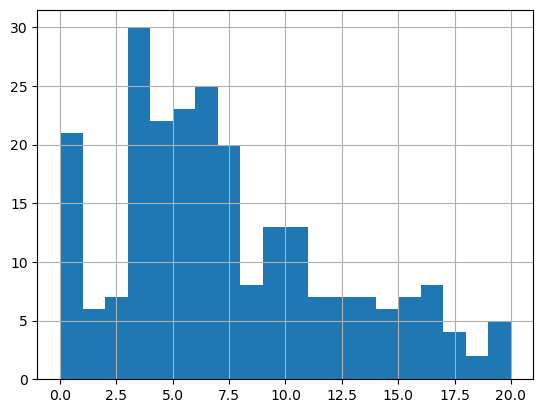

In [ ]:
protein = df.loc[:, "Protein_g"]
protein.hist(bins=20); # Create a histogram with 20 equally spaced bins (how many bars) for the data

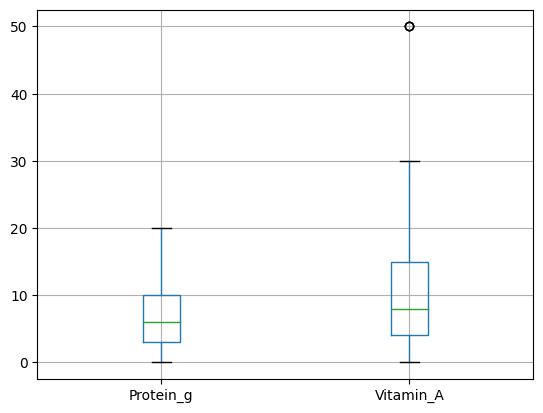

In [ ]:
subplot = df[["Protein_g", "Vitamin_A"]] # Notice another way to get desired columns
subplot.boxplot(); # Boxplots give median value, middle 50% of data, and range of non-outliers

# Putting it all together

*Cynthia was not sure she was analyzing the BND dataset correctly.  Maybe, she thought, she should analyze mortality in a different, more well-known dataset first.*

We'll try putting it all together with a new dataset, the Titanic dataset.  This dataset has survival data on all the passengers on the Titanic.  It also has information like the gender of the passenger and how much they paid for a ticket.

We can explore this data with the question, are there variables that tend to predict survival for certain passengers?  Specificallly, did gender, age, or class matter in who survived?

The data is in a CSV file, so we can load that up first.

In [ ]:
# Skip this cell if not working in Google Colab
from google.colab import files

uploaded = files.upload() # pick titanic.csv

Saving titanic.csv to titanic (1).csv


Some relevant variables to us are Survived (1 if they did, 0 if they didn't), Pclass (1st, 2nd, or 3rd class), Sex, and Age.  The variables we'll ignore are SibSp (how many siblings or spouses on the Titanic), Parch (number of parents or children on the Titanic), Ticket number, the fare paid, the cabin number, and the port of embarkation.

In [ ]:
df = pd.read_csv('titanic.csv', index_col = 'PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We next make sure there's nothing unexpected about the column names or the types of these columns.  Aside from sex being a string instead of a more convenient number, everything here is as expected.

In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.dtypes

,0
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Cabin,object


What is the overall average survival rate?  The average age?  We can use describe() to get a sense of the numeric variables.

In [ ]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Now, what was correlated with survival?  We can use df.corr() to see.

In [ ]:
df.corr(numeric_only=True)

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


It looks like age doesn't have much relationship with the survived variable, but Pclass has a weak negative correlation with it (third class has lower survival than first).

Sex isn't in the table because it's not numeric.  But we can compute the survival rates separately for men and women.

In [ ]:
males = df[df['Sex'] == 'male']
males.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [ ]:
males.describe() #survival rate of 0.1889

,Survived,Pclass,Age,SibSp,Parch,Fare
count,577.000000,577.000000,453.000000,577.000000,577.000000,577.000000
mean,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893
std,0.391775,0.813580,14.678201,1.061811,0.612294,43.138263
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.000000,0.000000,0.000000,10.500000
75%,0.000000,3.000000,39.000000,0.000000,0.000000,26.550000
max,1.000000,3.000000,80.000000,8.000000,5.000000,512.329200


In [ ]:
females = df[df['Sex'] == 'female']
females.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,314.000000,314.000000,261.000000,314.000000,314.000000,314.000000
mean,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
std,0.438211,0.857290,14.110146,1.156520,1.022846,57.997698
min,0.000000,1.000000,0.750000,0.000000,0.000000,6.750000
25%,0.000000,1.000000,18.000000,0.000000,0.000000,12.071875
50%,1.000000,2.000000,27.000000,0.000000,0.000000,23.000000
75%,1.000000,3.000000,37.000000,1.000000,1.000000,55.000000
max,1.000000,3.000000,63.000000,8.000000,6.000000,512.329200


That's certainly a larger survival rate for women.  Can we compute a correlation?

We can, as long as we create a new column for our table with numeric values instead of strings.  We can create a boolean column of True and False for df['Sex'] == 'female', then add this column to our dataframe by assigning it to a new column name.  The boolean values will be interpreted as 0 and 1 for the correlation.

In [ ]:
df['sex_numeric'] = df['Sex'] == 'female'

In [ ]:
df.corr(numeric_only=True) #correlation between sex and survival is 0.543351, quite strong

,Survived,Pclass,Age,SibSp,Parch,Fare,sex_numeric
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.543351
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.131900
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.093254
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.114631
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.245489
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.182333
sex_numeric,0.543351,-0.131900,-0.093254,0.114631,0.245489,0.182333,1.000000


That's a pretty strong correlation, the strongest in the table.

Circling back to the class of cabin, we could visualize the three survival rates using the built-in histogram method.

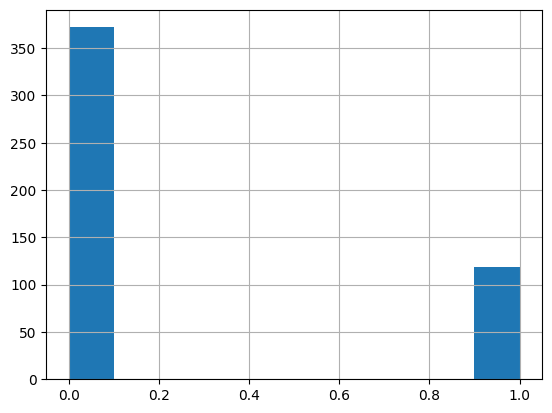

In [ ]:
third_class = df[df['Pclass'] == 3]
second_class = df[df['Pclass'] == 2]
first_class = df[df['Pclass'] == 1]
third_class['Survived'].hist();

#if value is true --> 1, if false --> 0

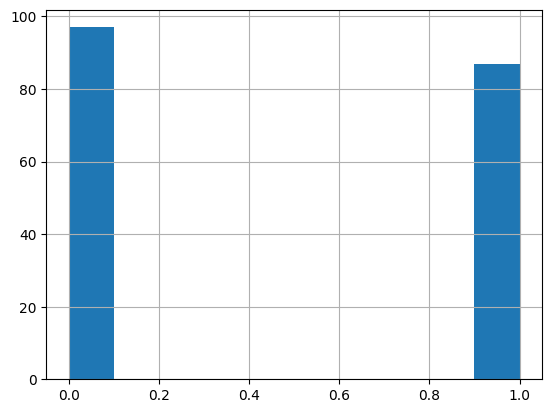

In [ ]:
second_class['Survived'].hist();

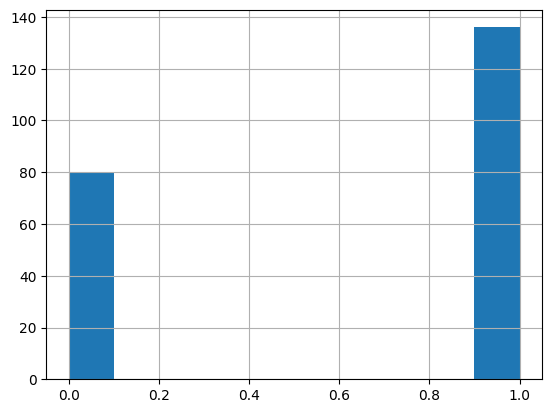

In [ ]:
first_class['Survived'].hist();